### Python Project

#### Dataset Exploration

In [12]:
import pandas as pd

In [14]:
#to load data 
df = pd.read_csv("C:/Users/swath/Downloads/Popular_Baby_Names.csv")

#to display the loaded data
print(df.head(10))

   Year of Birth  Gender Ethnicity Child's First Name  Count  Rank
0           2011  FEMALE  HISPANIC          GERALDINE     13    75
1           2011  FEMALE  HISPANIC                GIA     21    67
2           2011  FEMALE  HISPANIC             GIANNA     49    42
3           2011  FEMALE  HISPANIC            GISELLE     38    51
4           2011  FEMALE  HISPANIC              GRACE     36    53
5           2011  FEMALE  HISPANIC          GUADALUPE     26    62
6           2011  FEMALE  HISPANIC             HAILEY    126     8
7           2011  FEMALE  HISPANIC              HALEY     14    74
8           2011  FEMALE  HISPANIC             HANNAH     17    71
9           2011  FEMALE  HISPANIC             HAYLEE     17    71


In [16]:
#to display the shape of dataset
print(df.shape)

(49509, 6)


In [18]:
#to identify the data types of each column
print(df.dtypes)

Year of Birth          int64
Gender                object
Ethnicity             object
Child's First Name    object
Count                  int64
Rank                   int64
dtype: object


In [20]:
#to check for any missing values
print(df.isnull().sum())

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64


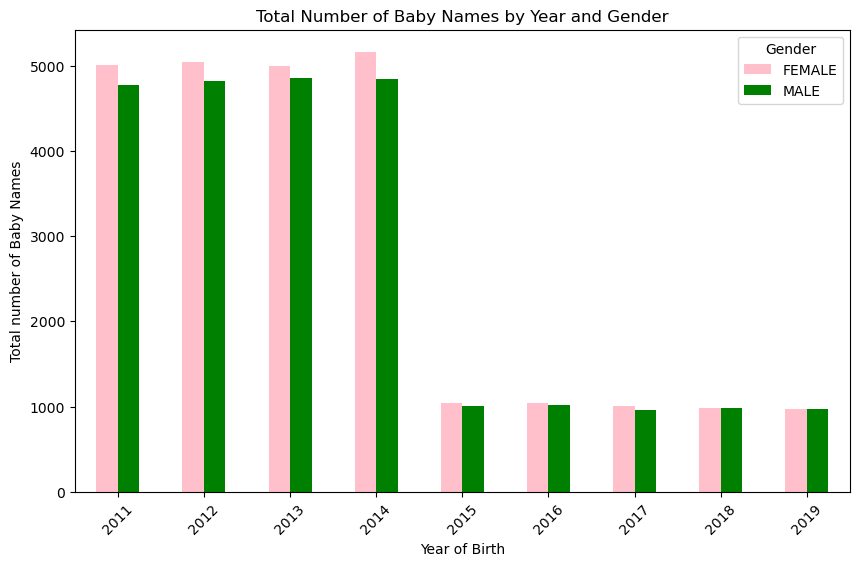

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
#Create a bar chart that shows the total number of baby names per year for each gender. 
Gender_count_by_year = df.groupby(['Year of Birth','Gender']).size().unstack()
Gender_count_by_year.plot(kind ='bar',figsize =(10,6),color=['pink','green'])
plt.title("Total Number of Baby Names by Year and Gender")
plt.xlabel("Year of Birth")
plt.ylabel("Total number of Baby Names")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

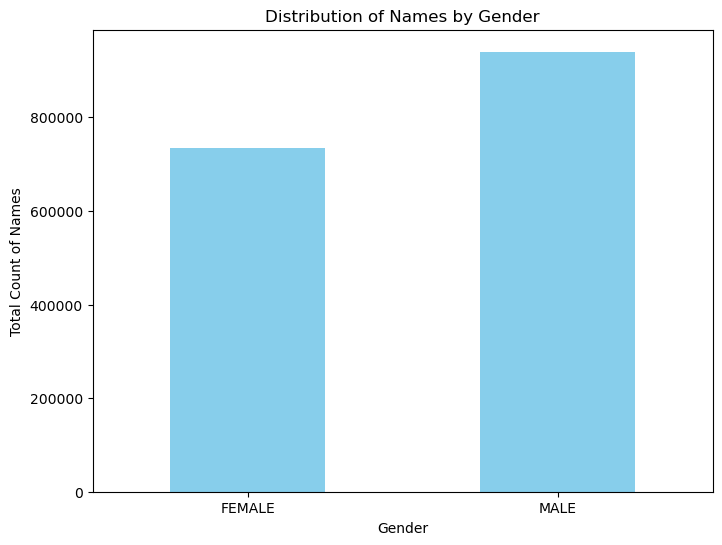

In [24]:
#Create a bar chart that shows the distribution of names (total number) by gender. 
# Calculate total counts by gender
gender_counts = df.groupby("Gender")["Count"].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Names by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Count of Names")
plt.xticks(rotation=0)
plt.show()

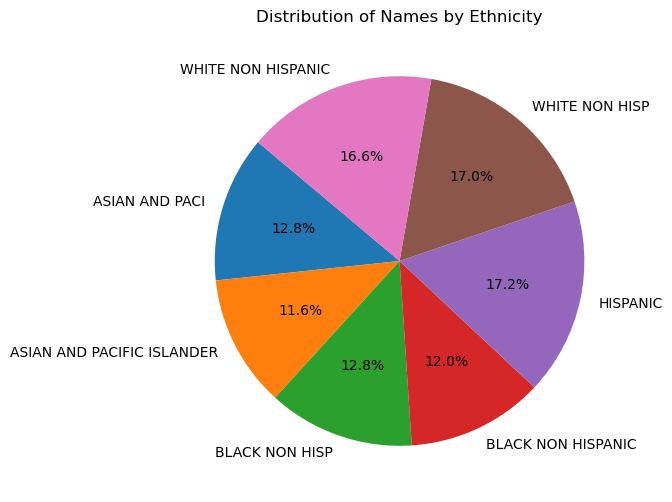

In [26]:
#Create a pie chart that shows the distribution of names (total number in percent) by ethnicity. 
#gender count in percentage
avg_ethnicity = df.groupby("Ethnicity")["Count"].mean()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(avg_ethnicity, labels=avg_ethnicity.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Names by Ethnicity")
plt.show()

#### Data Cleaning and Preparation

##### 1. Find Duplicate rows in the dataset for the year 2011

In [28]:
#Can you find any duplicated rows in the dataset for the year 2011 
duplicate_rows = df[df.duplicated() & (df['Year of Birth']==2011)]
print(duplicate_rows)

      Year of Birth  Gender           Ethnicity Child's First Name  Count  \
543            2011  FEMALE  WHITE NON HISPANIC           SCARLETT     31   
772            2011  FEMALE  WHITE NON HISPANIC             SERENA     16   
808            2011  FEMALE  WHITE NON HISPANIC             SHAINA     16   
878            2011  FEMALE  WHITE NON HISPANIC           SHAINDEL     15   
1049           2011  FEMALE  WHITE NON HISPANIC            SHAINDY     48   
...             ...     ...                 ...                ...    ...   
9784           2011    MALE  WHITE NON HISPANIC             YOUSEF     12   
9785           2011    MALE  WHITE NON HISPANIC            YOUSSEF     11   
9786           2011    MALE  WHITE NON HISPANIC            ZACHARY     86   
9787           2011    MALE  WHITE NON HISPANIC             ZALMEN     14   
9788           2011    MALE  WHITE NON HISPANIC                ZEV     47   

      Rank  
543     60  
772     75  
808     75  
878     76  
1049    44

##### 2. Rename the 'Year of Birth' column to 'Year_of_Birth' and 'Child's First Name' to 'Childs_First_Name'. 

In [30]:
#Renaming the give columns
renaming_columns = df.rename(columns={'Year of Birth':'Year_of_Birth',"Child's First Name":'Childs_First_Name'})
renaming_columns.head(5)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


##### 3. Create a new column that shows the length of each name, excluding any non-alphabetic characters (e.g. spaces or hyphens).  Name the new column 'Name_Length’.

In [32]:
#Create a new column to see the name length
import pandas as pd
# Creating a function named 'get_name_length' to calculate the length of a name excluding non-alphabetic characters
def get_name_length(name):
    return sum(char.isalpha() for char in name)
# Using a for loop to identify alphabetic characters with the isalpha() function and returning the total count.

# Using 'apply' function to apply 'get_name_length' function to each value of 'Childs_First_Name' column
df['Name_Length'] = df["Child's First Name"].apply(get_name_length)
df.head(5)


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Name_Length
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9
1,2011,FEMALE,HISPANIC,GIA,21,67,3
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7
4,2011,FEMALE,HISPANIC,GRACE,36,53,5


##### 4. Create a new column called 'Percentage' that shows the percentage of babies with each name, based on the total number of babies born in that year and gender. 

In [38]:
import pandas as pd
#create a new column that shows the percentage of babies with each name
df['Percentage'] = (df['Count'] / df.groupby(['Year of Birth', 'Gender'])['Count'].transform('sum')) * 100
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Name_Length,Percentage
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9,0.008832
1,2011,FEMALE,HISPANIC,GIA,21,67,3,0.014268
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6,0.033291
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7,0.025817
4,2011,FEMALE,HISPANIC,GRACE,36,53,5,0.024459


##### 5.Replace the ethnic category 'Black or African American Non-Hispanic' with 'Black Non-Hispanic'. 

In [44]:
#replacing the specified ethnic category
df['Ethnicity'] = df['Ethnicity'].replace('Black or African American Non-Hispanic', 'Black Non-Hispanic')
specific_row = df.iloc[6484:6667]
print(specific_row)

      Year of Birth  Gender           Ethnicity Child's First Name  Count  \
6484           2011  FEMALE  BLACK NON HISPANIC            ADDISON     13   
6485           2011  FEMALE  BLACK NON HISPANIC              AICHA     14   
6486           2011  FEMALE  BLACK NON HISPANIC              AISHA     10   
6487           2011  FEMALE  BLACK NON HISPANIC           AISSATOU     13   
6488           2011  FEMALE  BLACK NON HISPANIC              ALANA     18   
...             ...     ...                 ...                ...    ...   
6662           2011  FEMALE  BLACK NON HISPANIC             ZARIAH     14   
6663           2011  FEMALE  BLACK NON HISPANIC                ZOE     43   
6664           2011  FEMALE  BLACK NON HISPANIC               ZOEY     29   
6665           2011  FEMALE  BLACK NON HISPANIC               ZURI     10   
6666           2011  FEMALE            HISPANIC            AALIYAH     63   

      Rank  Name_Length  Percentage  
6484    42            7    0.008832  

#### Data Analysis and Visualization

##### 1. How many children were named Jacob in 2018 and what is the ethnicity distribution of those children? 

In [48]:
# Filtering the DataFrame for Jacob in the year 2018
jacob_2018 = df[(df['Child\'s First Name'] == 'Jacob') & (df['Year of Birth'] == 2018)]

# Count of children named Jacob in 2018
total_jacob_2018 = jacob_2018['Count'].sum()

# Ethnicity distribution of children named Jacob in 2018
ethnicity_distribution = jacob_2018.groupby('Ethnicity')['Count'].sum()

print('Total_Jacob_2018:', total_jacob_2018, '\n', ethnicity_distribution)

Total_Jacob_2018: 540 
 Ethnicity
ASIAN AND PACIFIC ISLANDER     46
BLACK NON HISPANIC             36
HISPANIC                      241
WHITE NON HISPANIC            217
Name: Count, dtype: int64


##### 2.Create a line plot that shows the frequency of the top 5 names for the female gender between 2013 and 2015. 

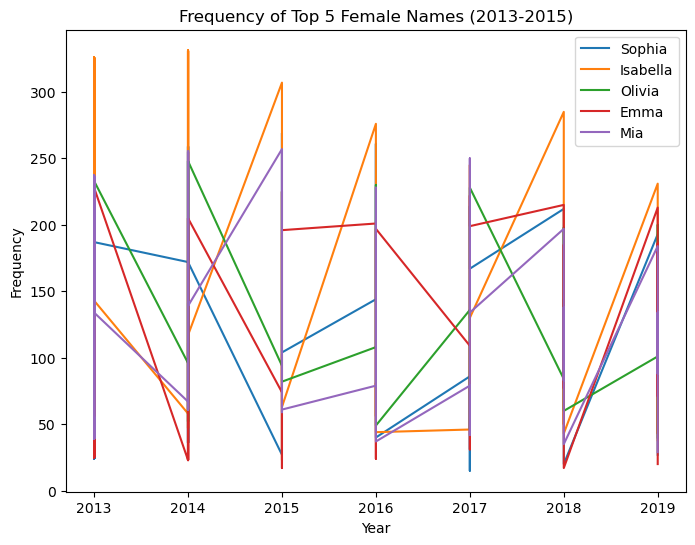

In [52]:
#finding the frequency of top 5 female names between 2013 and 2015
df = pd.read_csv("C:/Users/swath/Downloads/Popular_Baby_Names.csv")
top_female_names = df[(df['Gender'] == 'FEMALE') & (df['Year of Birth'].between(2013, 2015))]
top_female_names = top_female_names.groupby('Child\'s First Name')['Count'].sum().nlargest(5)

#creating a line plot
plt.figure(figsize=(8, 6))
for name in top_female_names.index:
    data = df[(df['Child\'s First Name'] == name) & (df['Gender'] == 'FEMALE')]
    plt.plot(data['Year of Birth'], data['Count'], label=name)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Top 5 Female Names (2013-2015)')
plt.legend()
plt.show()

##### 3.What is the relationship between the length of names and their frequency, and how does it differ between genders? The scatter plot should show the length of names on the x-axis, the frequency on the y-axis, and should use color to differentiate between male and female names. 

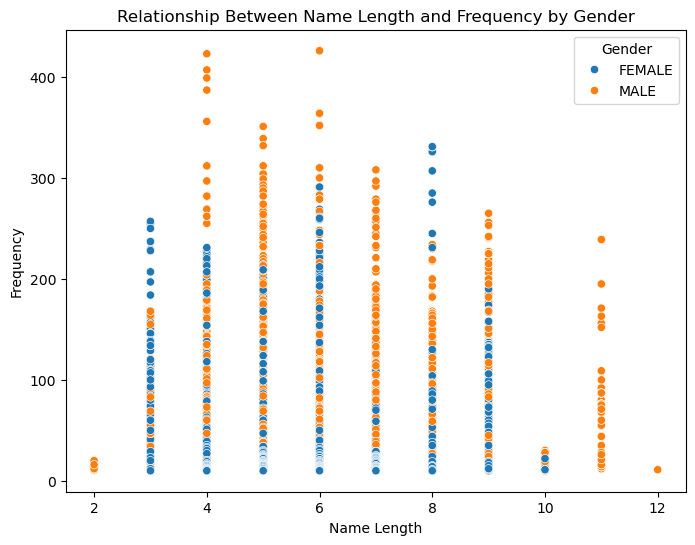

In [56]:
import seaborn as sns
# Calculate name length
df['Name_Length'] = df["Child's First Name"].apply(len)
# Create a scatter plot for name length vs. frequency with color differentiation for genders
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Name_Length', y='Count', hue='Gender', data=df)
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.title('Relationship Between Name Length and Frequency by Gender')
plt.legend(title='Gender')
plt.show()

##### 4.Create a scatter plot that shows the correlation between name length and frequency for the 'ASIAN AND PACI' ethnicity. Consider the yearly average count for each name. 

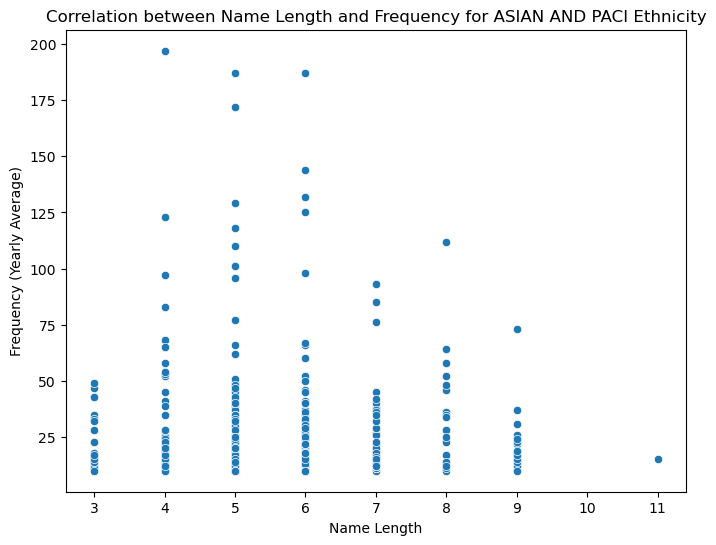

In [59]:
# Filter the DataFrame for 'ASIAN AND PACI' ethnicity
asian_paci_data = df[df['Ethnicity'] == 'ASIAN AND PACI']

# Calculate the yearly average count for each name
yearly_avg_count = asian_paci_data.groupby(["Child's First Name", 'Year of Birth'])['Count'].mean().reset_index()

# Calculate name length
yearly_avg_count['Name_Length'] = yearly_avg_count["Child's First Name"].apply(len)

# Create a scatter plot for correlation between name length and frequency for 'ASIAN AND PACI' ethnicity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Name_Length', y='Count', data=yearly_avg_count)
plt.xlabel('Name Length')
plt.ylabel('Frequency (Yearly Average)')
plt.title('Correlation between Name Length and Frequency for ASIAN AND PACI Ethnicity')
plt.show()